In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
!git clone https://github.com/denisvivdenko/titanic_practice_dataset.git

In [16]:
!cd titanic_practice_dataset

/content/titanic_practice_dataset


In [17]:
!git pull origin master

remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 1), reused 6 (delta 1), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/denisvivdenko/titanic_practice_dataset
 * branch            master     -> FETCH_HEAD
   16b4af3..de57885  master     -> origin/master
Updating 16b4af3..de57885
Fast-forward
 test.csv  | 419 +++++++++++++++++++++++++++++
 train.csv | 892 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 2 files changed, 1311 insertions(+)
 create mode 100644 test.csv
 create mode 100644 train.csv


In [18]:
df = pd.read_csv("train.csv")

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.shape

(891, 12)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


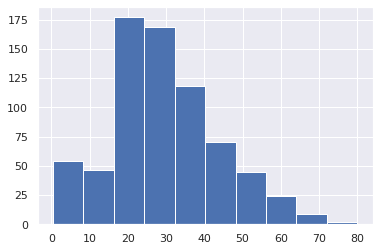

In [25]:
sns.set()
df.Age.hist();

In [68]:
X, y = df.drop("Survived", axis=1), df.Survived

In [69]:
X.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [70]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [71]:
X.Ticket.nunique()

681

Why if the Ticket feature is ticket number even though we don't have missing values they are only 681 unique out of 891

In [72]:
X.Ticket.value_counts().head(20)

347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
17421           4
349909          4
113760          4
4133            4
113781          4
W./C. 6608      4
2666            4
19950           4
347077          4
C.A. 31921      3
Name: Ticket, dtype: int64

In [73]:
X["ticket_code"] = X.Ticket.map(lambda x: " ".join([ticket_info for ticket_info in x.split(" ") if not ticket_info.isnumeric()]))

In [76]:
X.loc[X.ticket_code == "", "ticket_code"] = "None"

In [77]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_code
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,None
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,None


In [79]:
X = X.drop("Ticket", axis=1)

In [82]:
X.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ticket_code
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,A/5
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,PC
